In [2]:
%matplotlib notebook

In [43]:
# import dependencies
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import stats

In [44]:
# add 2011 crime data
homicide = pd.read_csv("Data/homicide.csv", encoding="utf-8") 
homicide.head()

,CASE #,Date of Occurance,Primary Description,Description,Beat,Ward,Year,Latitude,Longitude,Month
0,HT405253,7/19/2011,HOMICIDE,FIRST DEGREE MURDER,732,6.0,2011,41.766565,-87.638386,7
1,HT578691,11/7/2011,HOMICIDE,FIRST DEGREE MURDER,2123,4.0,2011,41.822200,-87.602135,11
2,HT576092,11/5/2011,HOMICIDE,FIRST DEGREE MURDER,1122,28.0,2011,41.877169,-87.719061,11
3,HT581763,11/9/2011,HOMICIDE,FIRST DEGREE MURDER,522,34.0,2011,41.688889,-87.628242,11
4,HT582731,11/10/2011,HOMICIDE,FIRST DEGREE MURDER,614,18.0,2011,41.741304,-87.659690,11


In [45]:
# add in weather data
weather = pd.read_csv("Data/temperature.csv", encoding="utf-8") 

# rename the date column to matches homicide table
weather = weather.rename(columns={'datetime':'Date of Occurance',
                                 'Chicago':'Temperature'})

# find the average temp for the day
weather_group = weather.groupby("Date of Occurance")
weather_group = weather_group['Temperature'].mean().reset_index()

weather_group.head()

,Date of Occurance,Temperature
0,1/1/2013,273.474167
1,1/1/2014,264.871667
2,1/1/2015,267.988854
3,1/1/2016,268.802491
4,1/1/2017,270.790000


In [46]:
# filter for 2016
homicide_2016 = homicide.loc[homicide['Year'] == 2016]

homicide_2016 = homicide_2016.reset_index()

# find the count for the day
homicide_group = homicide_2016.groupby("Date of Occurance")
homicide_group = homicide_group['CASE #'].count().reset_index()

homicide_group

,Date of Occurance,CASE #
0,1/1/2016,3
1,1/11/2016,1
2,1/13/2016,3
3,1/14/2016,1
4,1/15/2016,1
...,...,...
308,9/4/2016,4
309,9/5/2016,9
310,9/6/2016,2
311,9/7/2016,1


In [47]:
# Merge two dataframes using a left join
merge_data = pd.merge(homicide_group, weather_group, on="Date of Occurance", how="left")
merge_data

,Date of Occurance,CASE #,Temperature
0,1/1/2016,3,268.802491
1,1/11/2016,1,258.921821
2,1/13/2016,3,259.010249
3,1/14/2016,1,272.033632
4,1/15/2016,1,277.573491
...,...,...,...
308,9/4/2016,4,293.217917
309,9/5/2016,9,296.374167
310,9/6/2016,2,300.727917
311,9/7/2016,1,300.897917


In [48]:
# variables to hold x and y
x_axis = merge_data['CASE #']
y_axis = merge_data['Temperature']

# Perform a linear regression on year versus violent crime rate
slope, intercept, rvalue, pvalue, std_err = stats.linregress(x_axis, y_axis)

# regression equation
fit = x_axis * slope + intercept

# create the text of the line equation for slope intercept equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

<IPython.core.display.Javascript object>


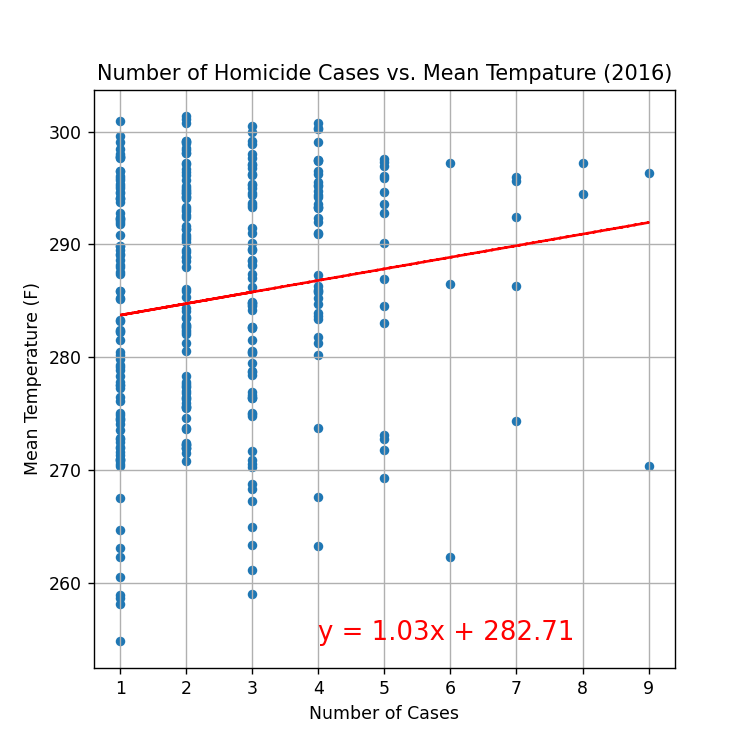

The r-value is: 0.021761194594883057


In [54]:
# Create a scatter plot which compares number of homicides to mean Temp
merge_data.plot(kind="scatter", x="CASE #", y="Temperature", grid=True, figsize=(6,6),
              title="Number of Homicide Cases vs. Mean Tempature (2016)")
plt.xlabel('Number of Cases')
plt.ylabel('Mean Temperature (F)')
plt.plot(x_axis,fit,"--",color="r")
plt.annotate(line_eq,(4,255),fontsize=15,color="red")
plt.show()
print(f"The r-value is: {rvalue**2}")